Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers 
(depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, 
and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, 
earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability 
customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for 
liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing 
department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of 
purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), 
the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last 
personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was 
offered to them in the earlier campaign.


•	Read the column description and ensure you understand each attribute well.

•	Study the data distribution in each attribute, share your findings. (5 points)

•	Get the target column distribution. Your comments

•	Split the data into training and test set in the ratio of 70:30 respectively

•	Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer 
    buying personal loans (15 points)
    
•	Print the confusion matrix for all the above models (5 points)

•	Give your reasoning on which is the best model in this case and why it performs better? (5 points)

    
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the data from csv
thera_bank = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
thera_bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Checking for Null values
thera_bank.isnull().values.any()

False

In [4]:
# Checking for duplicated values
thera_bank[thera_bank.duplicated()]

# No duplicate records found.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [5]:
# Doing some counts and validations 
thera_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
thera_bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
# We can see, the experience in negative. This cant be possible. Fetching the data.
thera_bank[thera_bank['Experience']<0]


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [8]:
# Either we can make the experience data rectified or we can delete it. 
# We can delete 52  records. 
thera_bank[thera_bank['Experience']<0].count()
thera_bank.drop(thera_bank[thera_bank['Experience']<0].index, inplace =True)

In [9]:
# Now continuing with next step of analysis.
thera_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 14 columns):
ID                    4948 non-null int64
Age                   4948 non-null int64
Experience            4948 non-null int64
Income                4948 non-null int64
ZIP Code              4948 non-null int64
Family                4948 non-null int64
CCAvg                 4948 non-null float64
Education             4948 non-null int64
Mortgage              4948 non-null int64
Personal Loan         4948 non-null int64
Securities Account    4948 non-null int64
CD Account            4948 non-null int64
Online                4948 non-null int64
CreditCard            4948 non-null int64
dtypes: float64(1), int64(13)
memory usage: 579.8 KB


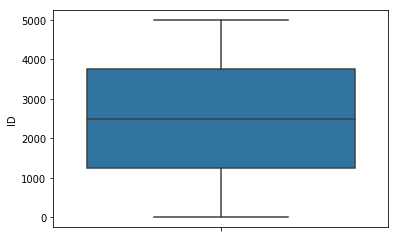

In [10]:
# Study the data distribution in each attribute, share your findings. (5 points)
# 1) ID Column
# This is numeric column which represents unique identification for each row. 

sns.boxplot(y=thera_bank['ID'])
# We can drop this column from dataset.

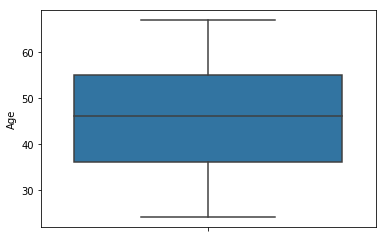

(array([316., 501., 512., 615., 523., 473., 667., 535., 504., 302.]),
 array([24. , 28.3, 32.6, 36.9, 41.2, 45.5, 49.8, 54.1, 58.4, 62.7, 67. ]),
 <a list of 10 Patch objects>)

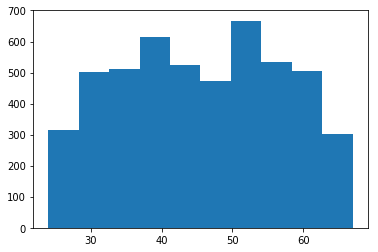

In [11]:
# 2) Age Column
sns.boxplot(y=thera_bank['Age'])
plt.show()
plt.hist(thera_bank['Age'])
# Age data seems to be quite normally distributed. 

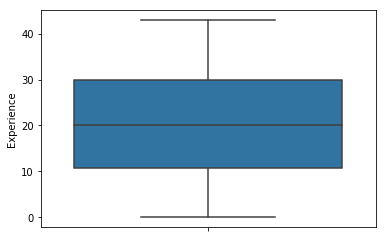

count    4948.000000
mean       20.331043
std        11.311973
min         0.000000
25%        10.750000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

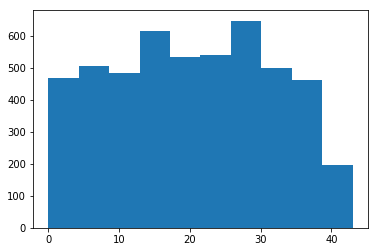

In [12]:
# 3) Experience column

sns.boxplot(y=thera_bank['Experience'])
plt.show()
plt.hist(thera_bank['Experience'])
thera_bank['Experience'].describe()

In [13]:
# Data distribution for Experience column doesnt shows normal distribution. We can check for outliers
thera_bank[thera_bank['Experience']< thera_bank['Experience'].mean()-3*thera_bank['Experience'].std() ]
thera_bank[thera_bank['Experience']> thera_bank['Experience'].mean()+3*thera_bank['Experience'].std() ]

# No outliers in the data for experience column.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


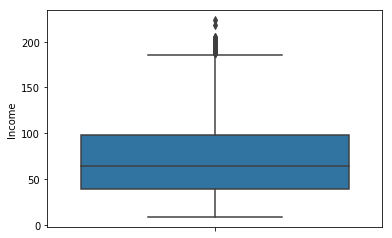

count    4948.000000
mean       73.814470
std        46.112596
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

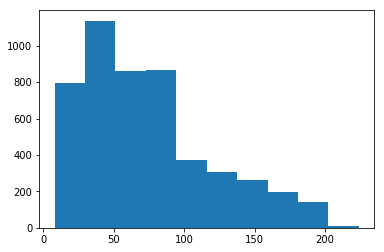

In [14]:
# 4) Income
sns.boxplot(y=thera_bank['Income'])
plt.show()
plt.hist(thera_bank['Income'])
thera_bank['Income'].describe()

# We could see some outliers in the Income column at upper side. It is heavily tailed at right side. 

In [15]:
# Check for outliers for the Income column.
thera_bank[thera_bank['Income']< thera_bank['Income'].mean()-3*thera_bank['Income'].std() ]
thera_bank[thera_bank['Income']> thera_bank['Income'].mean()+3*thera_bank['Income'].std() ]

# We can see 2 people with experience above 20+ and earning more than 200K, even though they are having education as "Undergrad"
# There might be the reason because they are having business or some niche skill experience.  
# Rather than deleting this data, we can keep it as and continue model building.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3896,3897,48,24,224,93940,2,6.67,1,0,0,0,1,1,1
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0


In [16]:
# 4) Zipcode
# It is numerical field and it is hard to utilize it in mathematical model building. 
# Zipcode can provide us statistical data distribution, for ex: categorizing earnings according to region or zipcodes. 
# This can be dropped as not much information can be utilized in model buidling


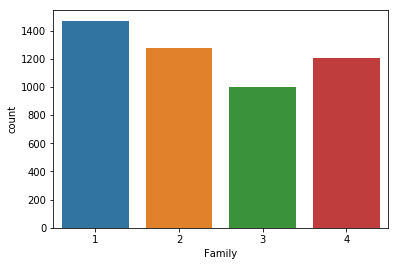

In [17]:
# 5) Family
sns.countplot(thera_bank['Family'])
# It is categorical column which is already converted into numerical. 
# We can convert it into dummy variable and separate for each model or we can use directly. 
# We will keep this column as it is and directly use it in model building rather than applying 1 hot encoding.

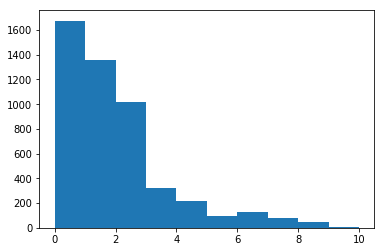

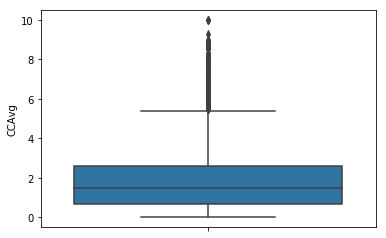

In [18]:
# 6) CCAvg ( Credit Card Average spending per month)
plt.hist(thera_bank['CCAvg'])
# The data curve for spend suggest, there are lot of people who are not using the card much and some of them spend too much. 
plt.show()
sns.boxplot(y=thera_bank['CCAvg'])

# Graph suggest, lot of them to be outliers but we can have close look to understand the data.

In [19]:
thera_bank[thera_bank['CCAvg']< thera_bank['CCAvg'].mean()-3*thera_bank['CCAvg'].std() ]
thera_bank[thera_bank['CCAvg']> thera_bank['CCAvg'].mean()+3*thera_bank['CCAvg'].std() ]

# There doesnt seems to reflect any pattern for the spend on credit card, except these individuals seems to be handsomely paid. 
# We will keep these outliers and continue forward.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
55,56,41,17,139,94022,2,8.0,1,0,0,0,0,1,0
131,132,58,34,149,93720,4,7.2,2,0,1,0,1,1,1
145,146,59,35,124,90007,1,7.4,1,0,0,0,0,0,1
150,151,46,22,118,94107,2,7.5,1,0,0,0,1,1,1
172,173,38,13,171,92717,2,7.8,1,0,0,0,0,1,0
174,175,42,17,168,95503,2,7.9,2,0,1,0,0,1,0
213,214,57,33,155,91326,1,7.4,1,0,0,0,0,1,0
227,228,47,23,148,94551,2,7.5,1,0,0,0,1,1,1


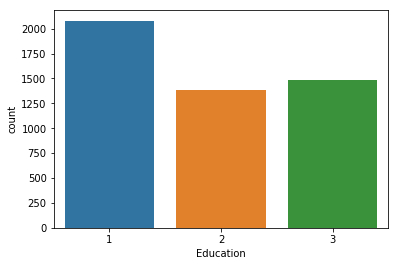

In [20]:
# 7) Education 
sns.countplot(thera_bank['Education'])
# It is categorical column converted to numerical. It underlines the education level where 
# 1 represent Undergrad, 2 for Graduate and 3 for Advanced/Professional

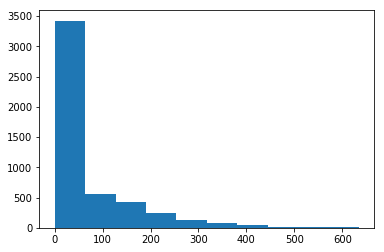

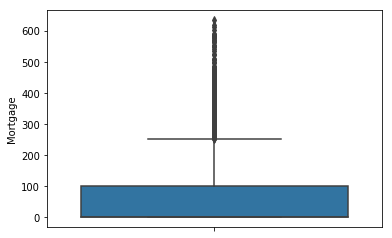

In [21]:
# 8) Mortgage
plt.hist(thera_bank['Mortgage'])
# The data curve suggests lot of people doesnt own any property and those who own has to pay the amount. 
plt.show()
sns.boxplot(y=thera_bank['Mortgage'])

0    4432
1     516
Name: Securities Account, dtype: int64

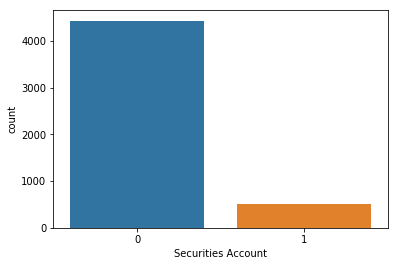

In [22]:
# 9) Securities account
sns.countplot(thera_bank['Securities Account'])
thera_bank['Securities Account'].value_counts()

# It is categorical type column which tells us how many people have securities account with bank or not. 

0    4646
1     302
Name: CD Account, dtype: int64

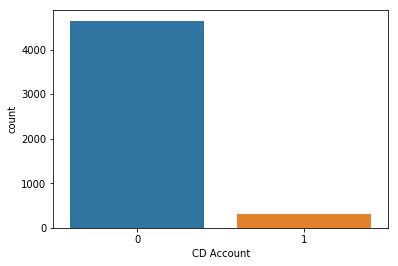

In [23]:
# 10) CD Account
sns.countplot(thera_bank['CD Account'])
thera_bank['CD Account'].value_counts()

# It is categorical type column which tells us how many people have fixed deposit or long term credit deposit with the bank . 

1    2954
0    1994
Name: Online, dtype: int64

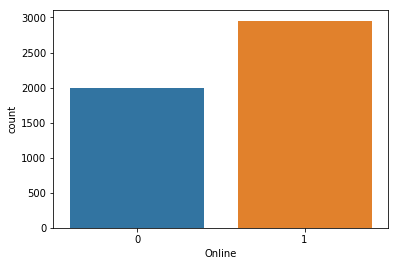

In [24]:
# 11) Online 
sns.countplot(thera_bank['Online'])
thera_bank['Online'].value_counts()
# Again a categorical column which is numerical, tells us how many employees use online facility with the bank. 

0    3493
1    1455
Name: CreditCard, dtype: int64

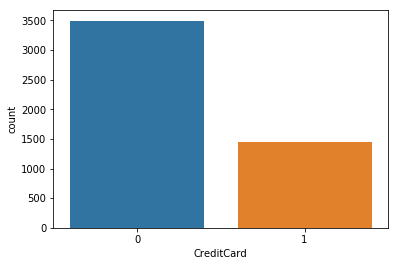

In [25]:
# 12) Credit Card
sns.countplot(thera_bank['CreditCard'])
thera_bank['CreditCard'].value_counts()
# Again a categorical column which is numerical, tells us how many employees use credit card issued by Universal bank. 

0    4468
1     480
Name: Personal Loan, dtype: int64

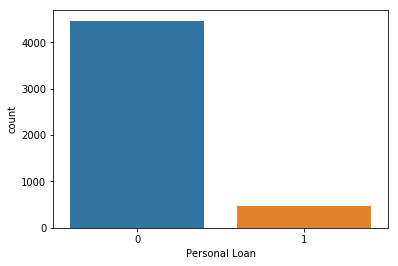

In [26]:
# 13) Personal Loan
# This is our target column.
sns.countplot(thera_bank['Personal Loan'])
thera_bank['Personal Loan'].value_counts()
# It tells only 480 people avail the loan from the bank out of near 5000 customers. This comes around 9% of penetration only.

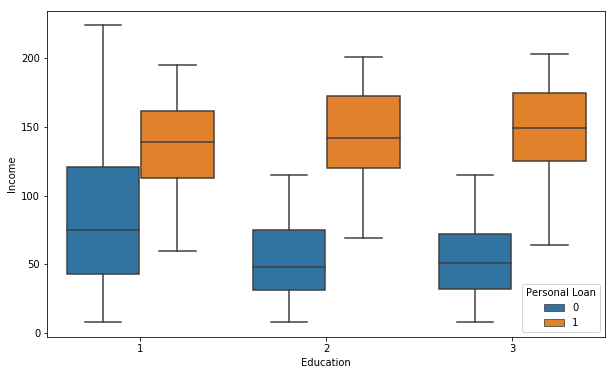

In [27]:
# General Observations
# Effect of Income and education on whether a customer takes Personal Loan

plt.figure(figsize=(10, 6))
sns.boxplot(x = 'Education', y = 'Income', hue = 'Personal Loan', data = thera_bank)

The boxplot shows that the customers with education level 1 have higher income. However, the customers who go for personal loans have the same income distribution regardless of their education level.

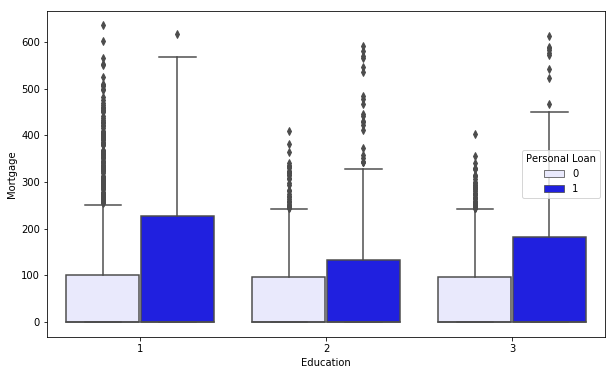

In [28]:
### Effect of Income and education on whether a customer takes Personal Loan
plt.figure(figsize=(10, 6))
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=thera_bank ,color='blue')

### Influence of Family on whether a customer applies for Personal loan

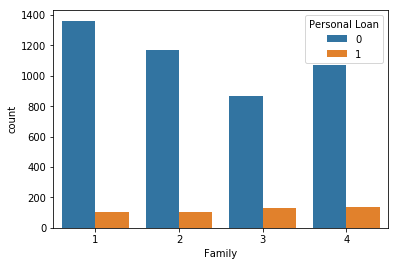

In [29]:
#plt.figure(figsize=(15, 6))
#sns.countplot(x="ZIP",data=thera_bank[thera_bank['Personal Loan']==1], hue ="Personal Loan",orient ='v')
sns.countplot(x = 'Family', data = thera_bank, hue = 'Personal Loan')

### Observation
Customers who do not have CD account, do not have loan as well. This goes with the mojority of the customers. 
But almost all customers who have CD account have loan as well.

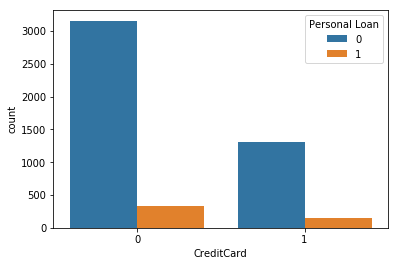

In [30]:
sns.countplot(x = 'CreditCard', hue = 'Personal Loan', data = thera_bank)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


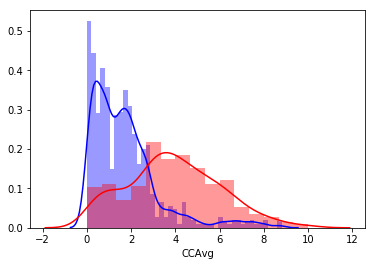

In [31]:
sns.distplot( thera_bank[thera_bank['Personal Loan'] == 0]['CCAvg'], color = 'b')
sns.distplot( thera_bank[thera_bank['Personal Loan'] == 1]['CCAvg'], color = 'r')

### Observation
Customers who have taken personal loan have higher credit card average than those who did not take. 
Therefore, high credit card average seems to be good predictor of whether or not a customer will take a personal loan.

In [32]:
# As identified by us earlier, before proceeding ahead we will drop ID and ZipCode column from the data set. 
thera_bank.drop(['ID', 'ZIP Code'], axis =1, inplace =True)
thera_bank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


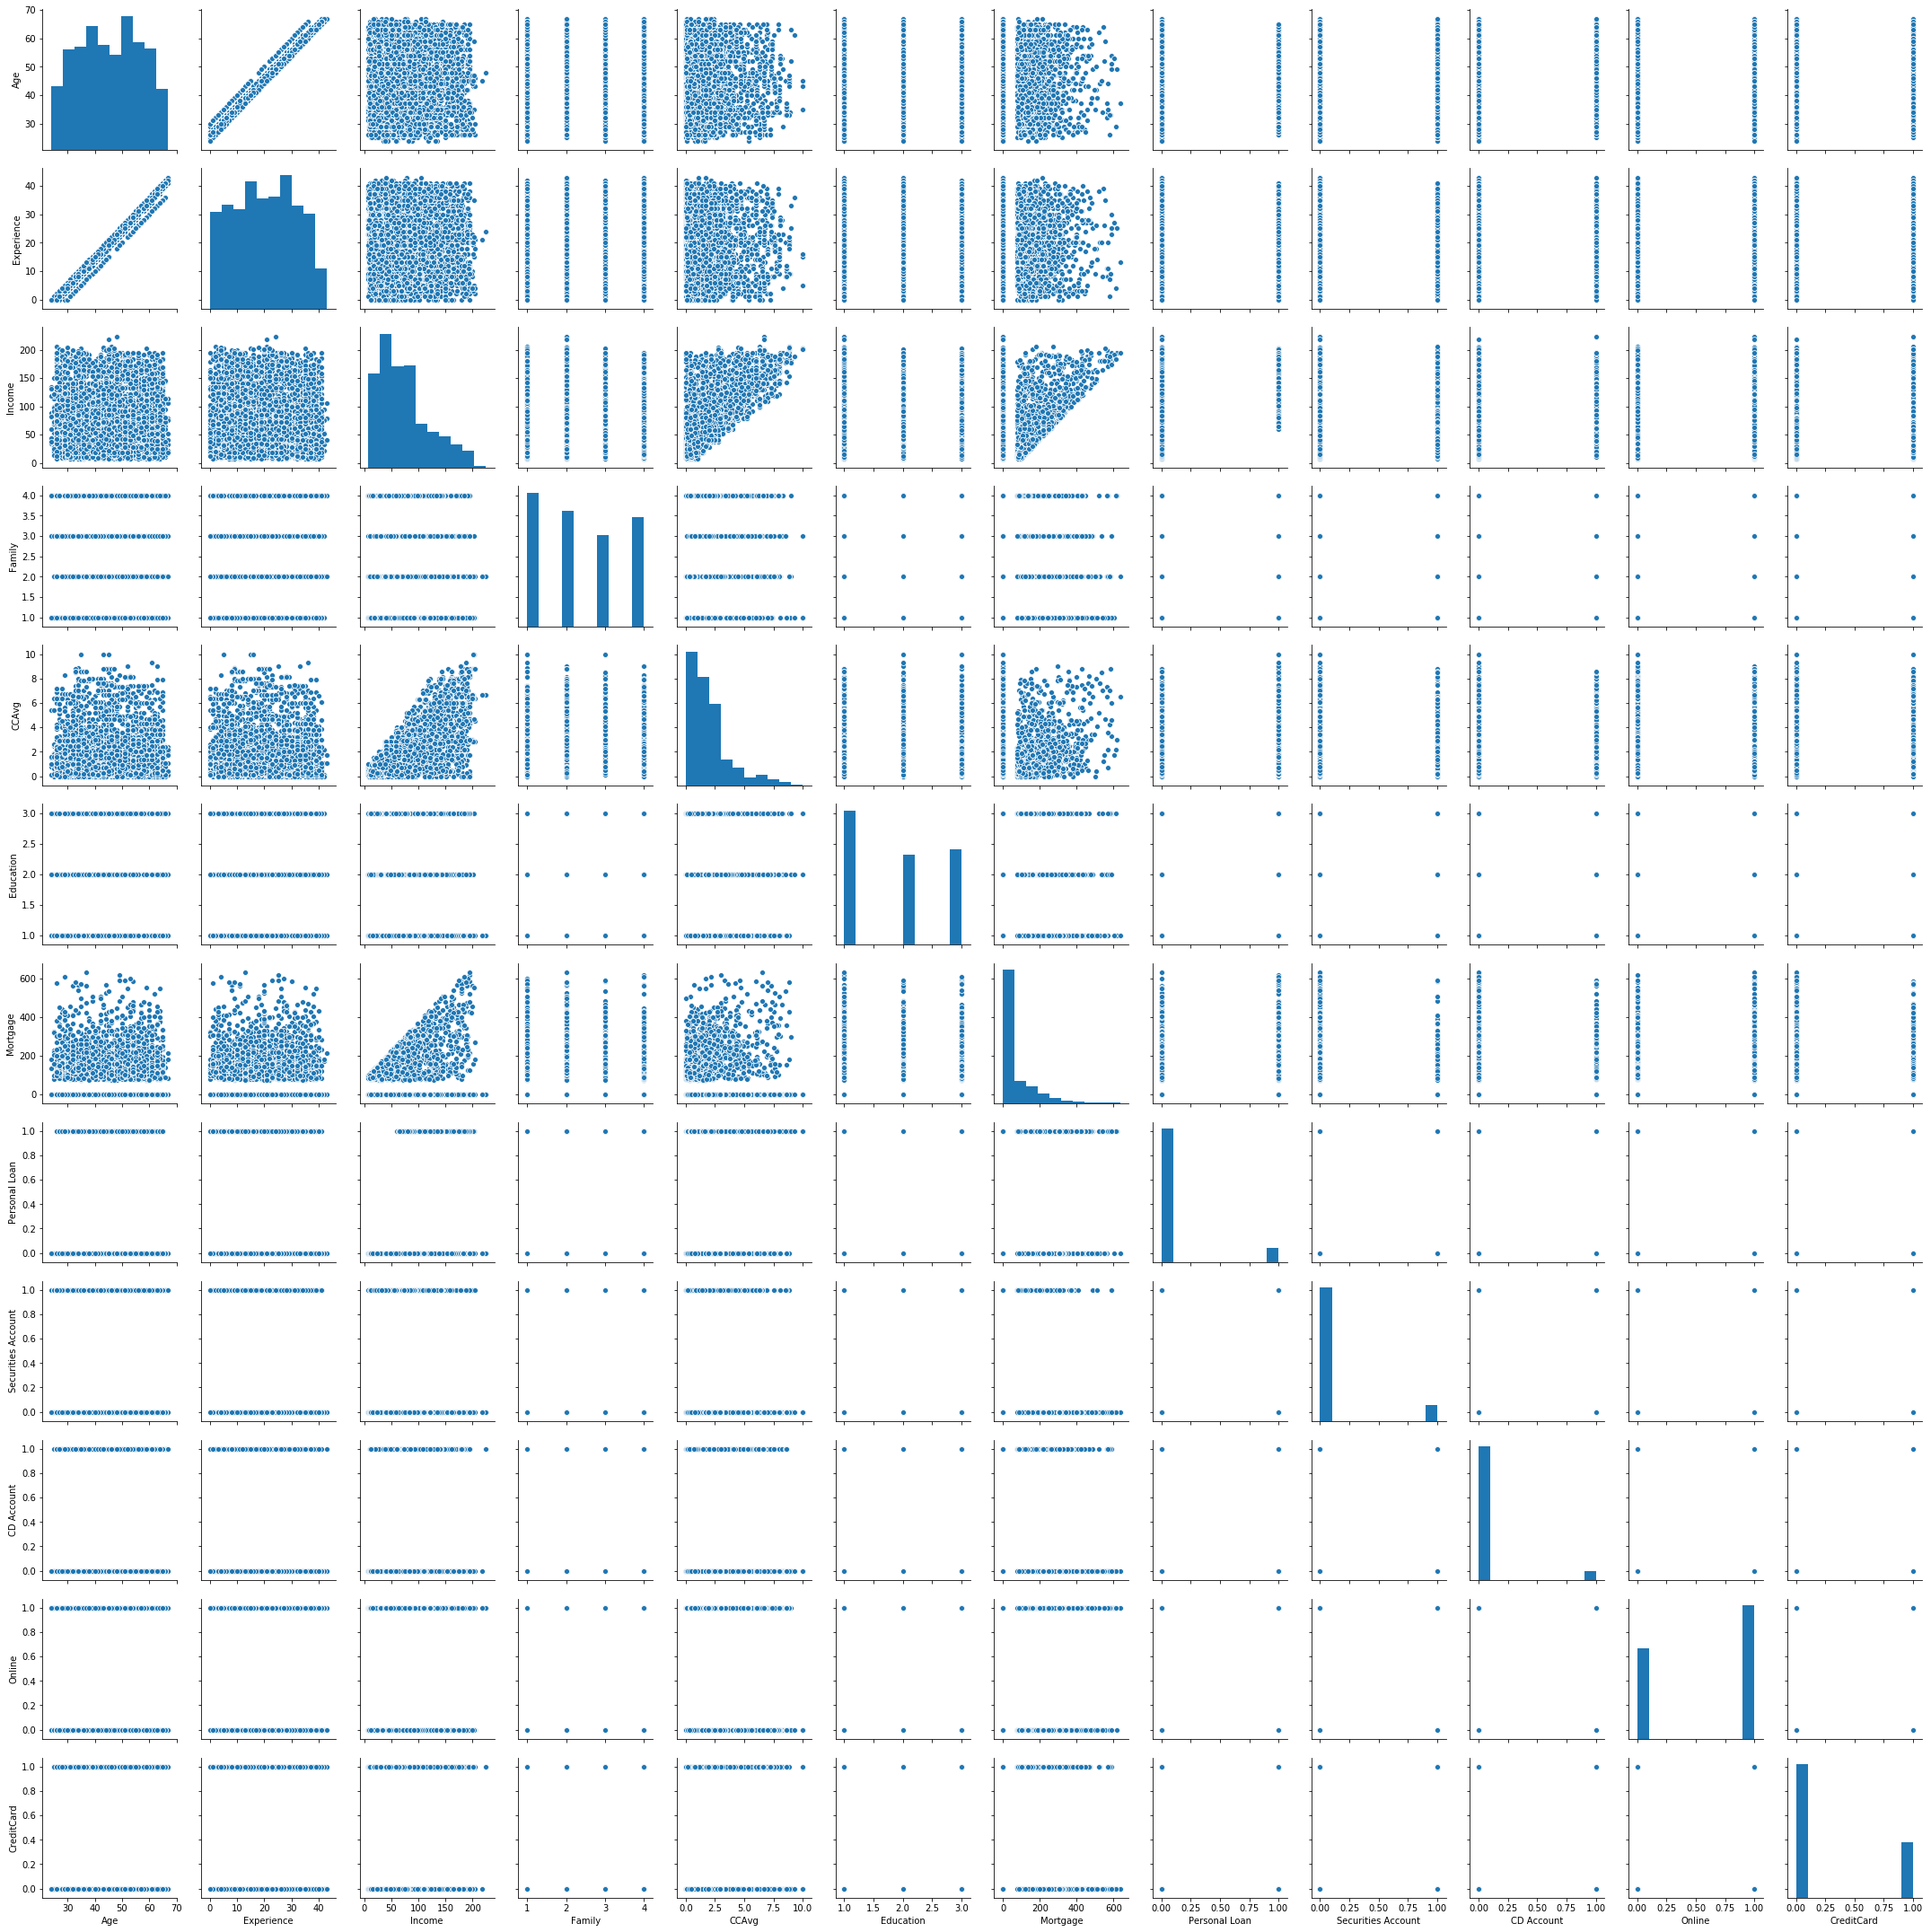

In [33]:
thera_bank.head()
sns.pairplot(thera_bank)

# Age and Experience are highly correlated.
# Income and CCAvg are moderately corelated.

In [34]:
# Dividing the datsets:-
# Dropping the Experience column also as it is highly correlated with Age.
x= thera_bank.drop(['Personal Loan', 'Experience'], axis =1)
y = thera_bank['Personal Loan']

# Splitting the data into train and test.
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size =0.3,random_state =5)

In [35]:
# Let us check the distribution of the data divided for target column. 
print(ytrain.value_counts())
print(ytest.value_counts())


# Data distribution for both the scenarios has been maintained around 9-10%, which is good enough for us to progress ahead.

0    3115
1     348
Name: Personal Loan, dtype: int64
0    1353
1     132
Name: Personal Loan, dtype: int64


In [36]:
# Since all the columns have different scales, we can apply scaling methods to make sure some columns doesnt have undue 
# advantage while calculating distance by knn. for ex. Its a good practice to look around scaling of data.

# 
from sklearn import preprocessing
# Using Standard Scalar for checking:-

scaler = preprocessing.StandardScaler().fit(xtrain)
xstrain = scaler.transform(xtrain)
xstest = scaler.transform(xtest)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [37]:
# Applying KNN as first model

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics



# Identifying the best K value for KNN model.
k = list(range(1,40))
for i in k:
    kneigh = KNeighborsClassifier(n_neighbors = i)
    kneigh.fit(xstrain, ytrain)    
    ypred = kneigh.predict(xstest)
    print('K is : %s'%(i),' Accuracy is: ',metrics.accuracy_score(ytest,ypred))  
    #print('K is : %s'%(i),' Precision is: ',metrics.precision_score(ytest,ypred)) 


K is : 1  Accuracy is:  0.9656565656565657
K is : 2  Accuracy is:  0.9622895622895623
K is : 3  Accuracy is:  0.9656565656565657
K is : 4  Accuracy is:  0.960942760942761
K is : 5  Accuracy is:  0.9649831649831649
K is : 6  Accuracy is:  0.9582491582491582
K is : 7  Accuracy is:  0.9595959595959596
K is : 8  Accuracy is:  0.9595959595959596
K is : 9  Accuracy is:  0.9622895622895623
K is : 10  Accuracy is:  0.9575757575757575
K is : 11  Accuracy is:  0.9582491582491582
K is : 12  Accuracy is:  0.9548821548821549
K is : 13  Accuracy is:  0.9575757575757575
K is : 14  Accuracy is:  0.9562289562289562
K is : 15  Accuracy is:  0.9575757575757575
K is : 16  Accuracy is:  0.9548821548821549
K is : 17  Accuracy is:  0.9569023569023569
K is : 18  Accuracy is:  0.9528619528619529
K is : 19  Accuracy is:  0.9555555555555556
K is : 20  Accuracy is:  0.9535353535353536
K is : 21  Accuracy is:  0.9548821548821549
K is : 22  Accuracy is:  0.9501683501683502
K is : 23  Accuracy is:  0.951515151515151

In [38]:
# Best K value as k = 3 for accuracy = .96

kneigh = KNeighborsClassifier(n_neighbors = 3)
kneigh.fit(xstrain, ytrain)    
ypred = kneigh.predict(xstest)

# Getting the  Accuracy and Confusion Matrix ddetails where we can find the  
print(metrics.accuracy_score(ytest,ypred))
print(metrics.precision_score(ytest, ypred))
print(metrics.confusion_matrix(ytest,ypred))
print(metrics.classification_report(ytest, ypred))  

0.9656565656565657
0.945054945054945
[[1348    5]
 [  46   86]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1353
           1       0.95      0.65      0.77       132

   micro avg       0.97      0.97      0.97      1485
   macro avg       0.96      0.82      0.88      1485
weighted avg       0.97      0.97      0.96      1485



In [39]:
# Applying 
from sklearn.naive_bayes import GaussianNB
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size =0.3,random_state =5)

gnb = GaussianNB()
gnb.fit(xtrain, ytrain) 
y_predict = gnb.predict(xtest)

print(metrics.accuracy_score(ytest,ypred))

print(metrics.precision_score(ytest, ypred))
print(metrics.confusion_matrix(ytest,ypred))
print(metrics.classification_report(ytest, ypred)) 

0.9656565656565657
0.945054945054945
[[1348    5]
 [  46   86]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1353
           1       0.95      0.65      0.77       132

   micro avg       0.97      0.97      0.97      1485
   macro avg       0.96      0.82      0.88      1485
weighted avg       0.97      0.97      0.96      1485



In [40]:
# Using Logistics regression
from sklearn.linear_model import LogisticRegression


xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size =0.3,random_state =5)
scaler = preprocessing.StandardScaler().fit(xtrain)
xstrain = scaler.transform(xtrain)
xstest = scaler.transform(xtest)

logmodel = LogisticRegression()
logmodel.fit(xstrain, ytrain)
predictions = logmodel.predict(xstest)

print(metrics.accuracy_score(ytest,ypred))
print(metrics.precision_score(ytest, ypred))
print(metrics.confusion_matrix(ytest,ypred))

0.9656565656565657
0.945054945054945
[[1348    5]
 [  46   86]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


NB: 0.882984 (0.011109)
KNN: 0.913907 (0.011091)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LOG: 0.949275 (0.008040)


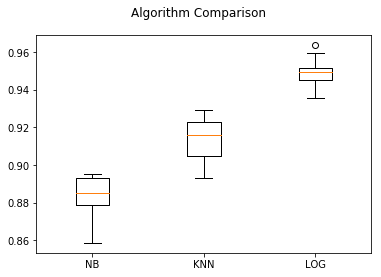

In [41]:
# Give your reasoning on which is the best model in this case and why it performs better?

#Currently all the Models are performing same. There seems to be lot of discrepency with identifying the correct model as 
# KNN , LOG and NB, all are performing upto same level considering confusion matrix.

# We will try using K-Fold and check out the performance if any benchmarking can provide general idea.

from sklearn import model_selection
models = []
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LOG', LogisticRegression()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Above comparison clears that LOG Regression should outperform KNN and NB in general. KNN and Logrithmic Regression are pretty close to each other as per standard. But Log Regression should be bit better than KNN as suggested by benchmarking. This study was done for Thera Bank to 
identify parameteres and conditions for converting them for Personal Loan